# Data cleaning using EDA

In [ ]:
#Data Manipulation and Treatment
import pandas as pd
import numpy as np
from datetime import datetime
#Plotting and Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
types = {
    'StateHoliday': str,
    'SchoolHoliday':str
}
df_train = pd.read_csv("train.csv", parse_dates=['Date'], date_parser=dateparse,dtype = types)
df_test = pd.read_csv("test.csv", parse_dates=['Date'], date_parser=dateparse,dtype = types)
df_store = pd.read_csv("store.csv")

/var/folders/n0/v391ctcn3q935by3r0yv_bb80000gn/T/ipykernel_58362/2288963265.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_train = pd.read_csv("train.csv", parse_dates=['Date'], date_parser=dateparse,dtype = types)
/var/folders/n0/v391ctcn3q935by3r0yv_bb80000gn/T/ipykernel_58362/2288963265.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_test = pd.read_csv("test.csv", parse_dates=['Date'], date_parser=dateparse,dtype = types)


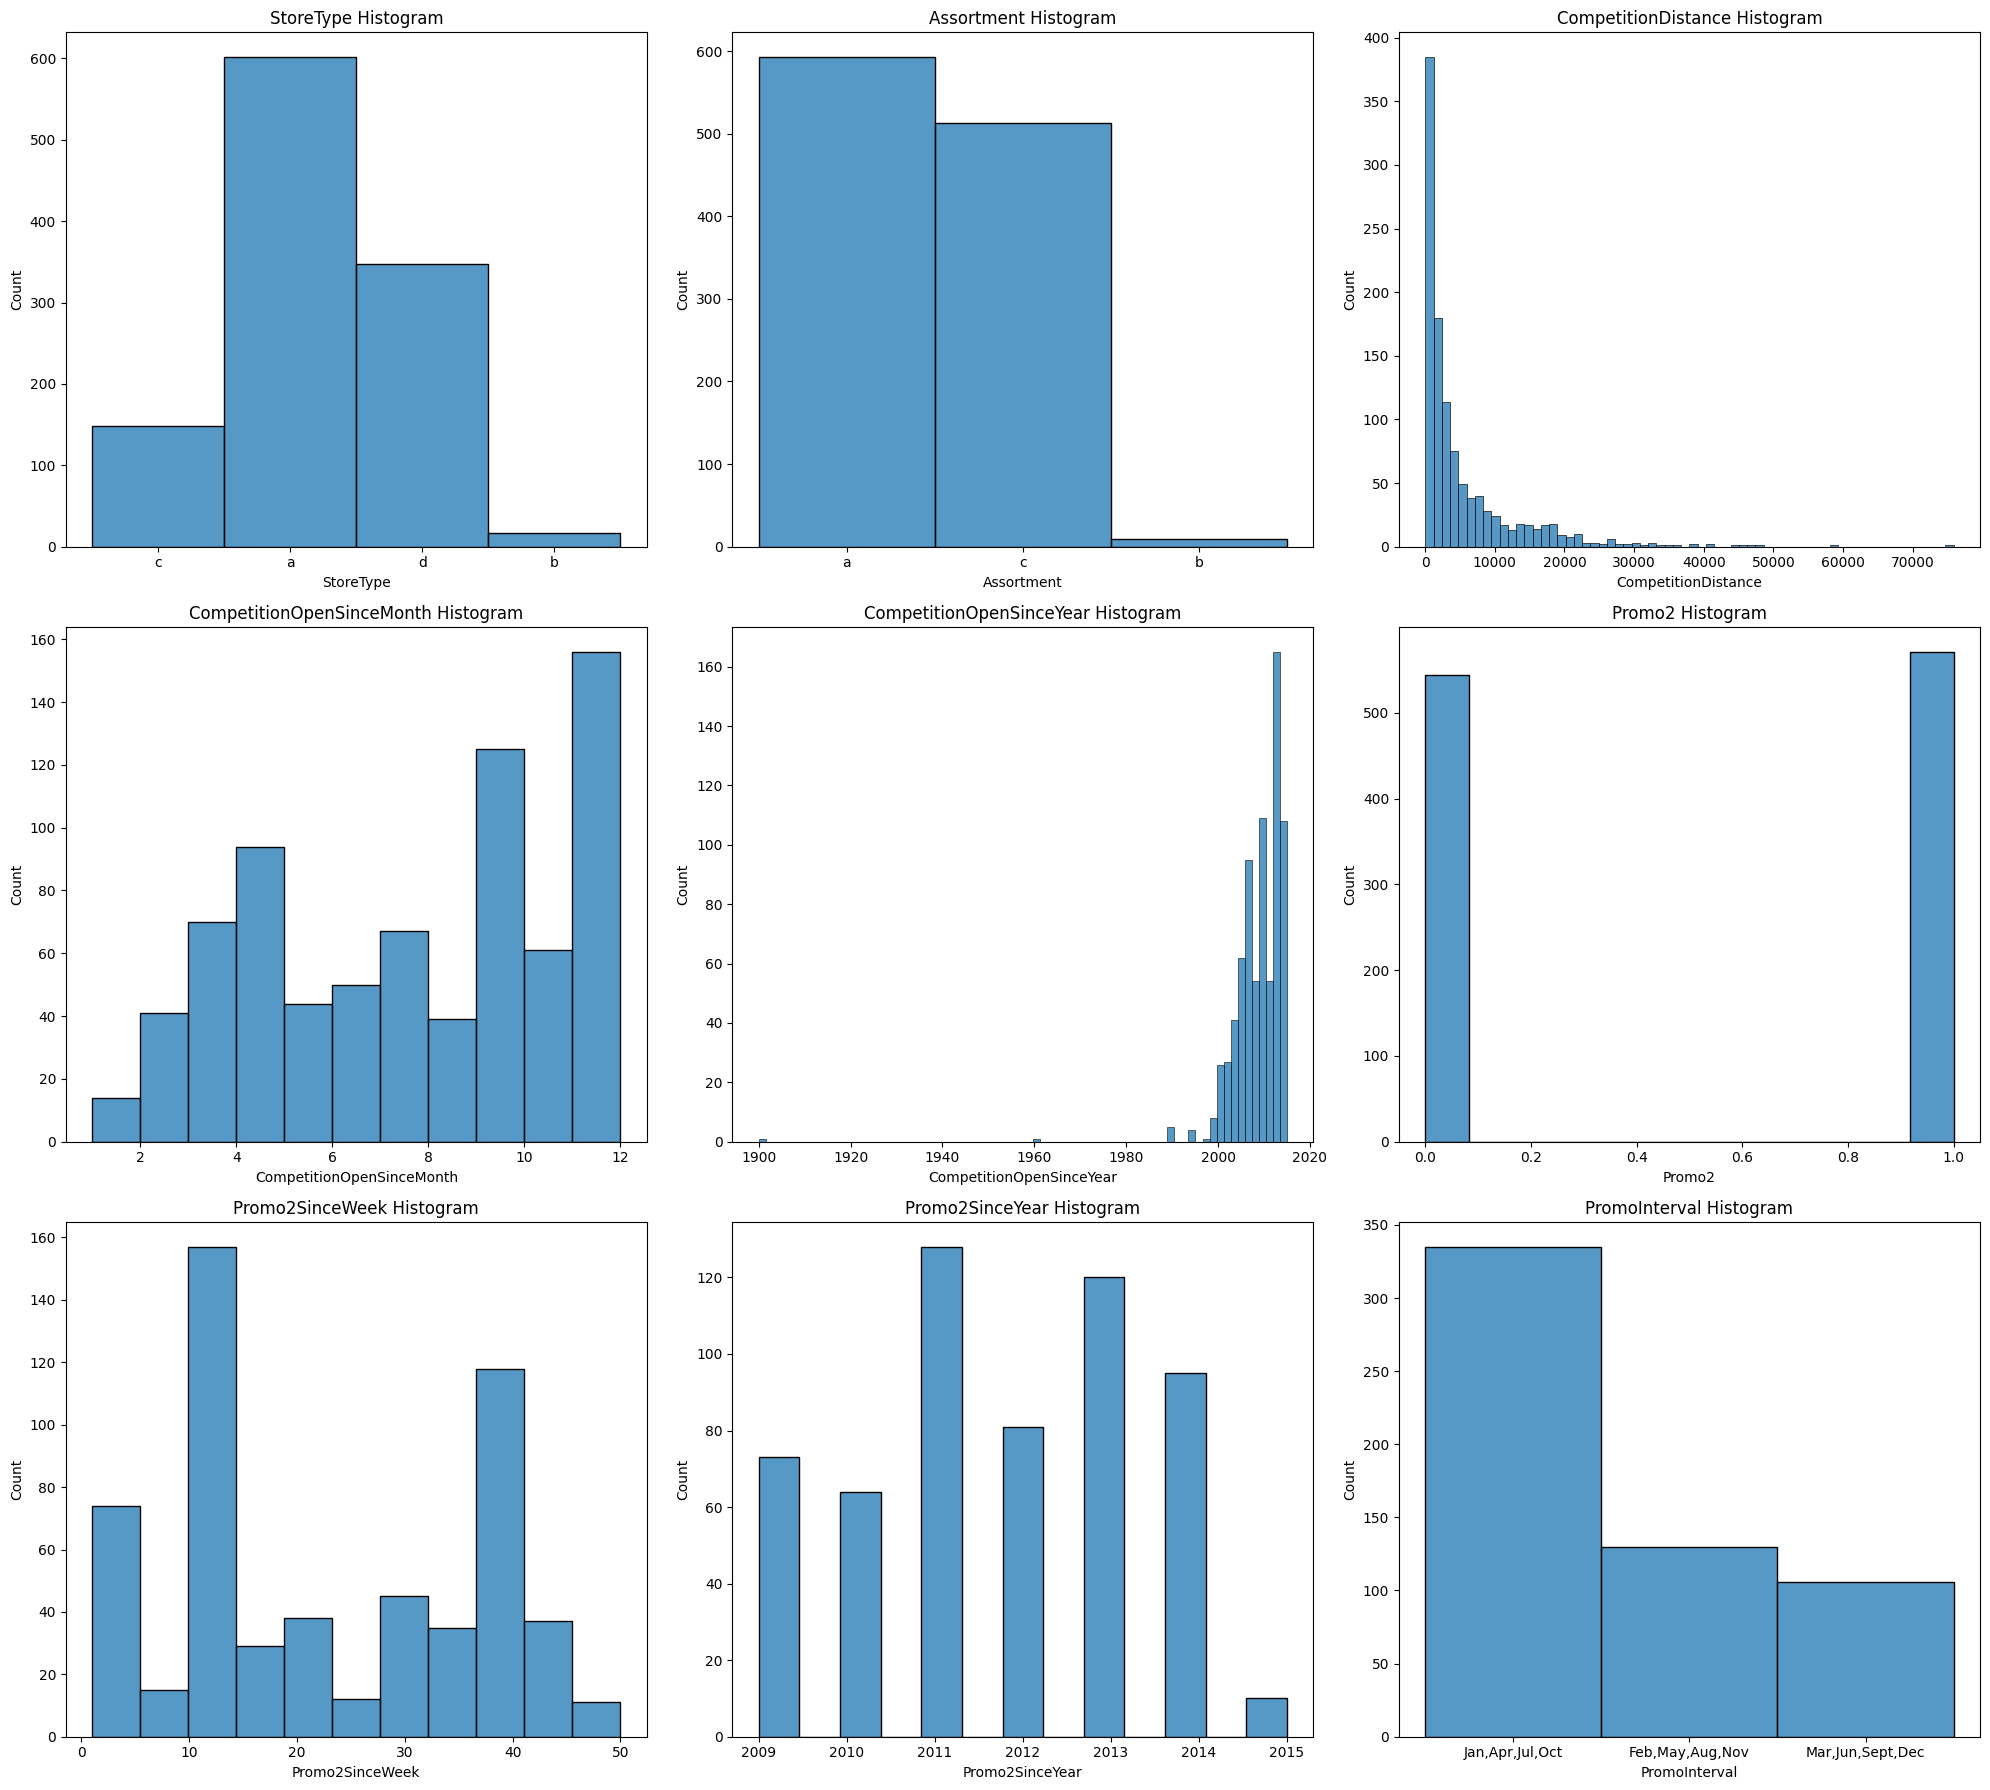

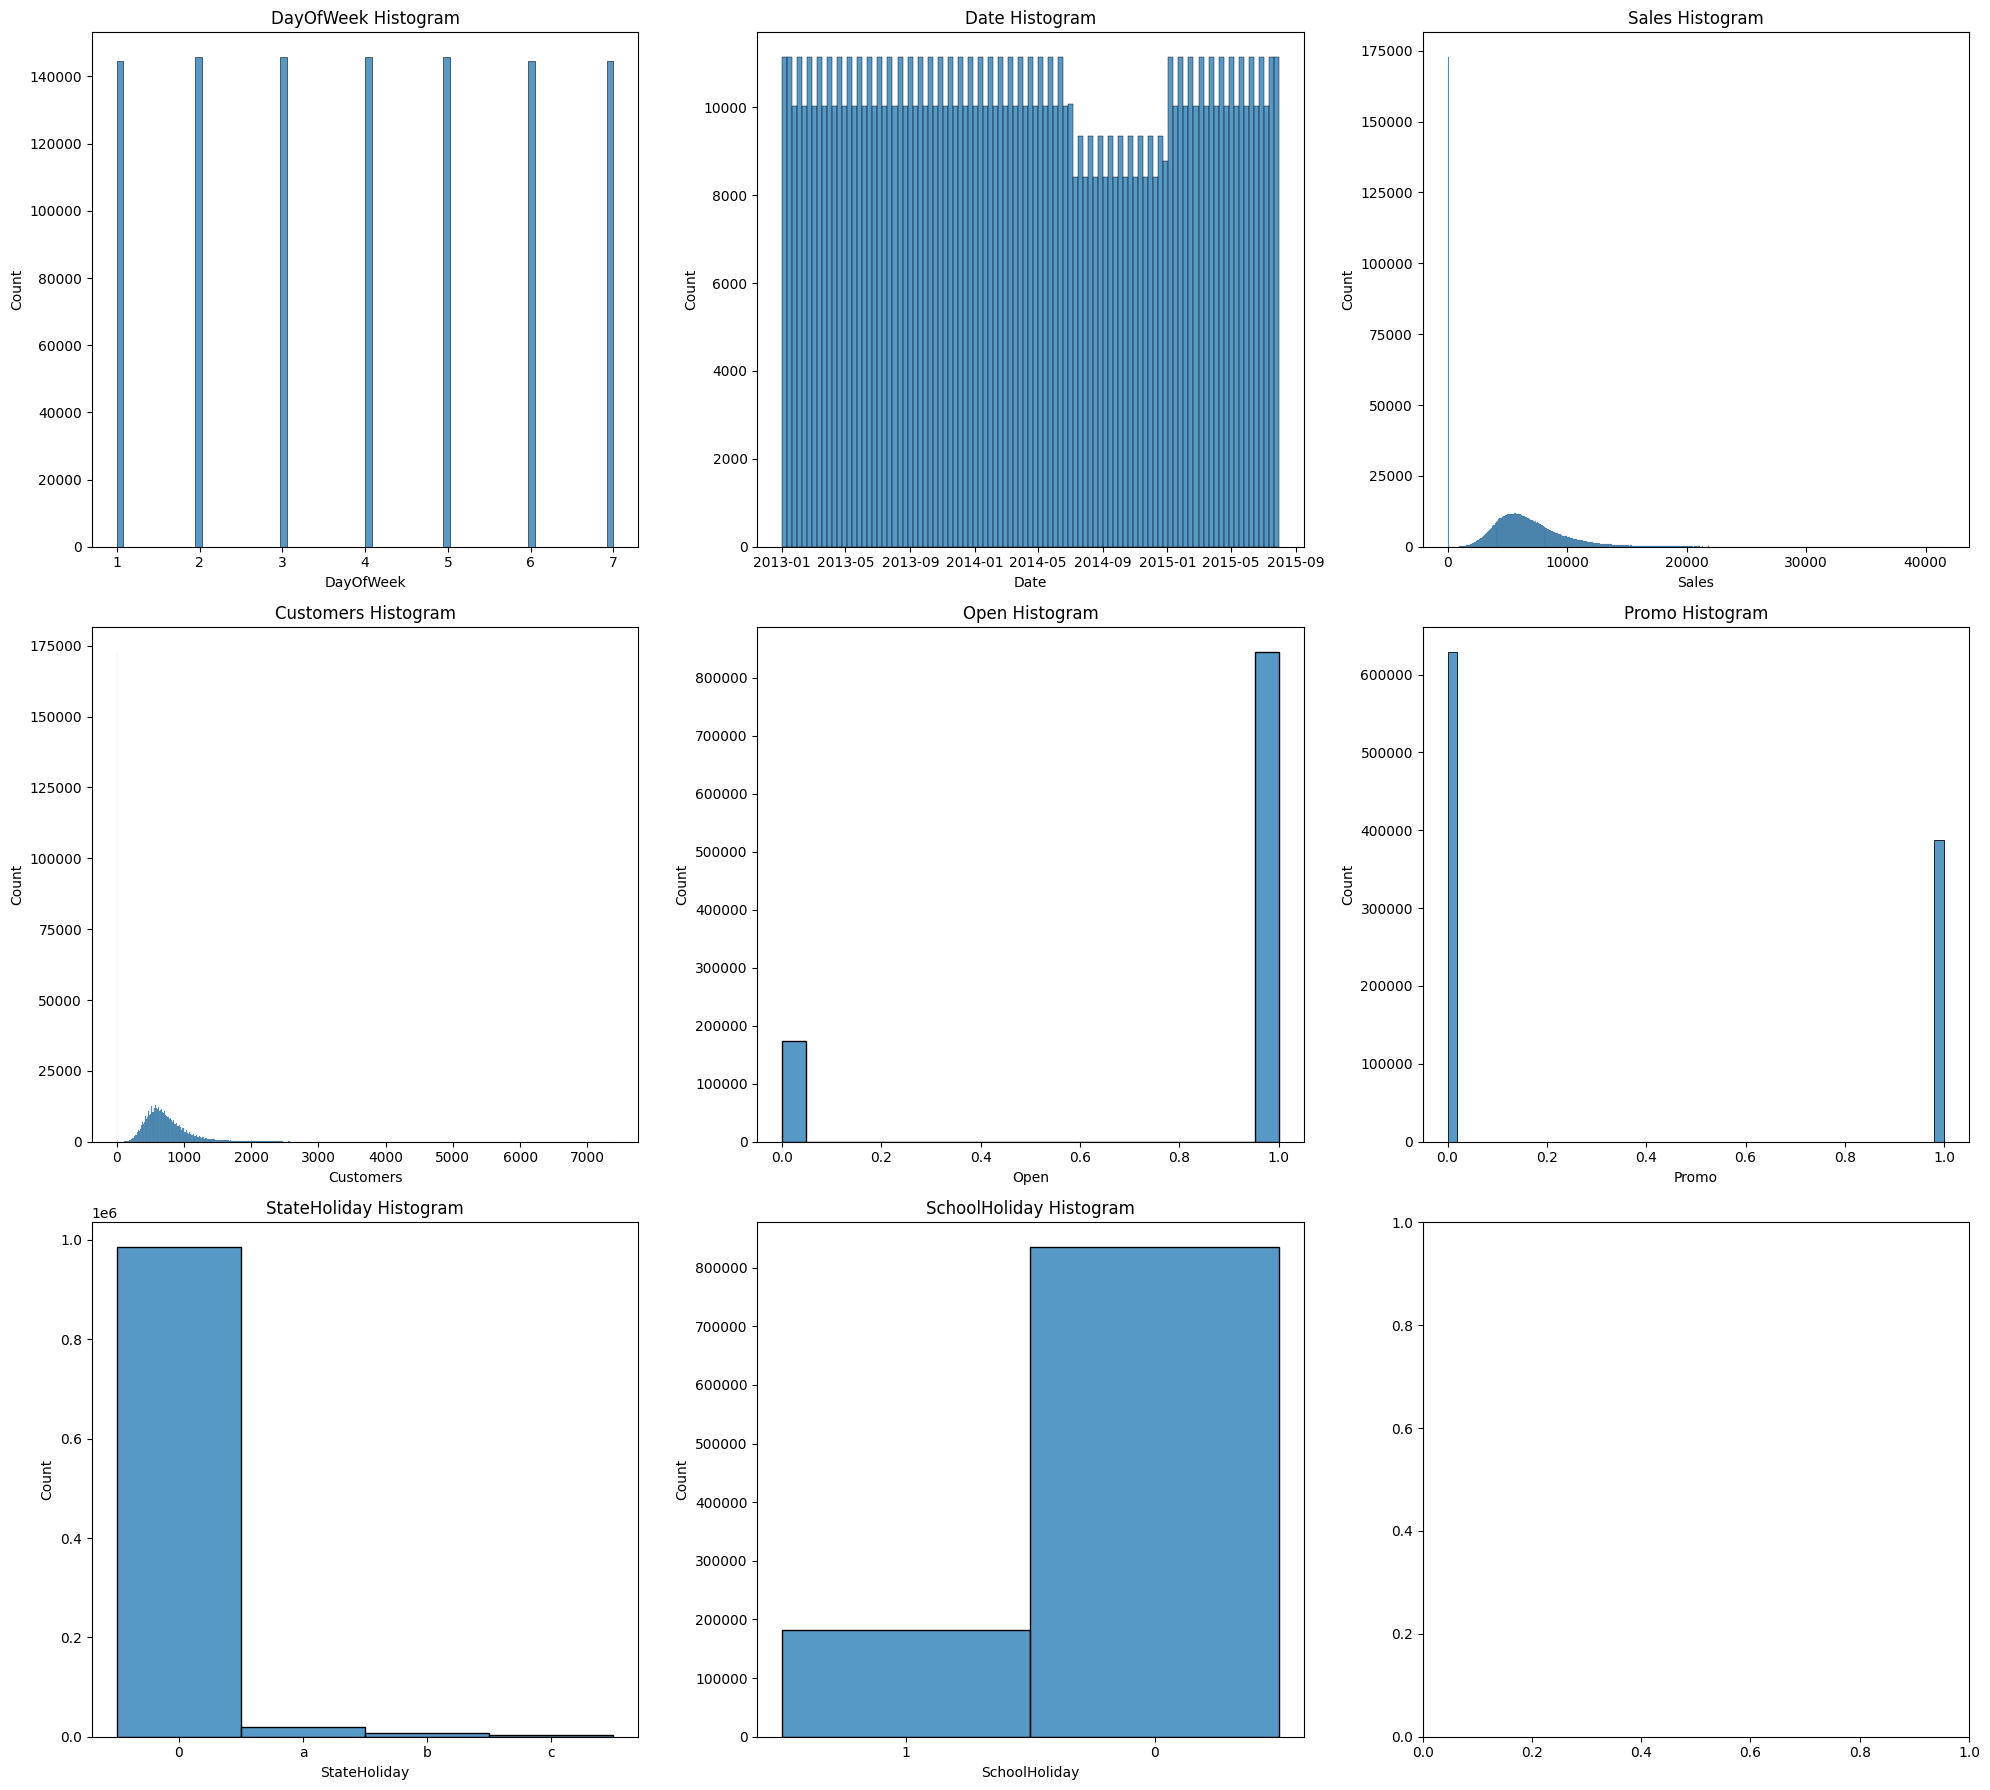

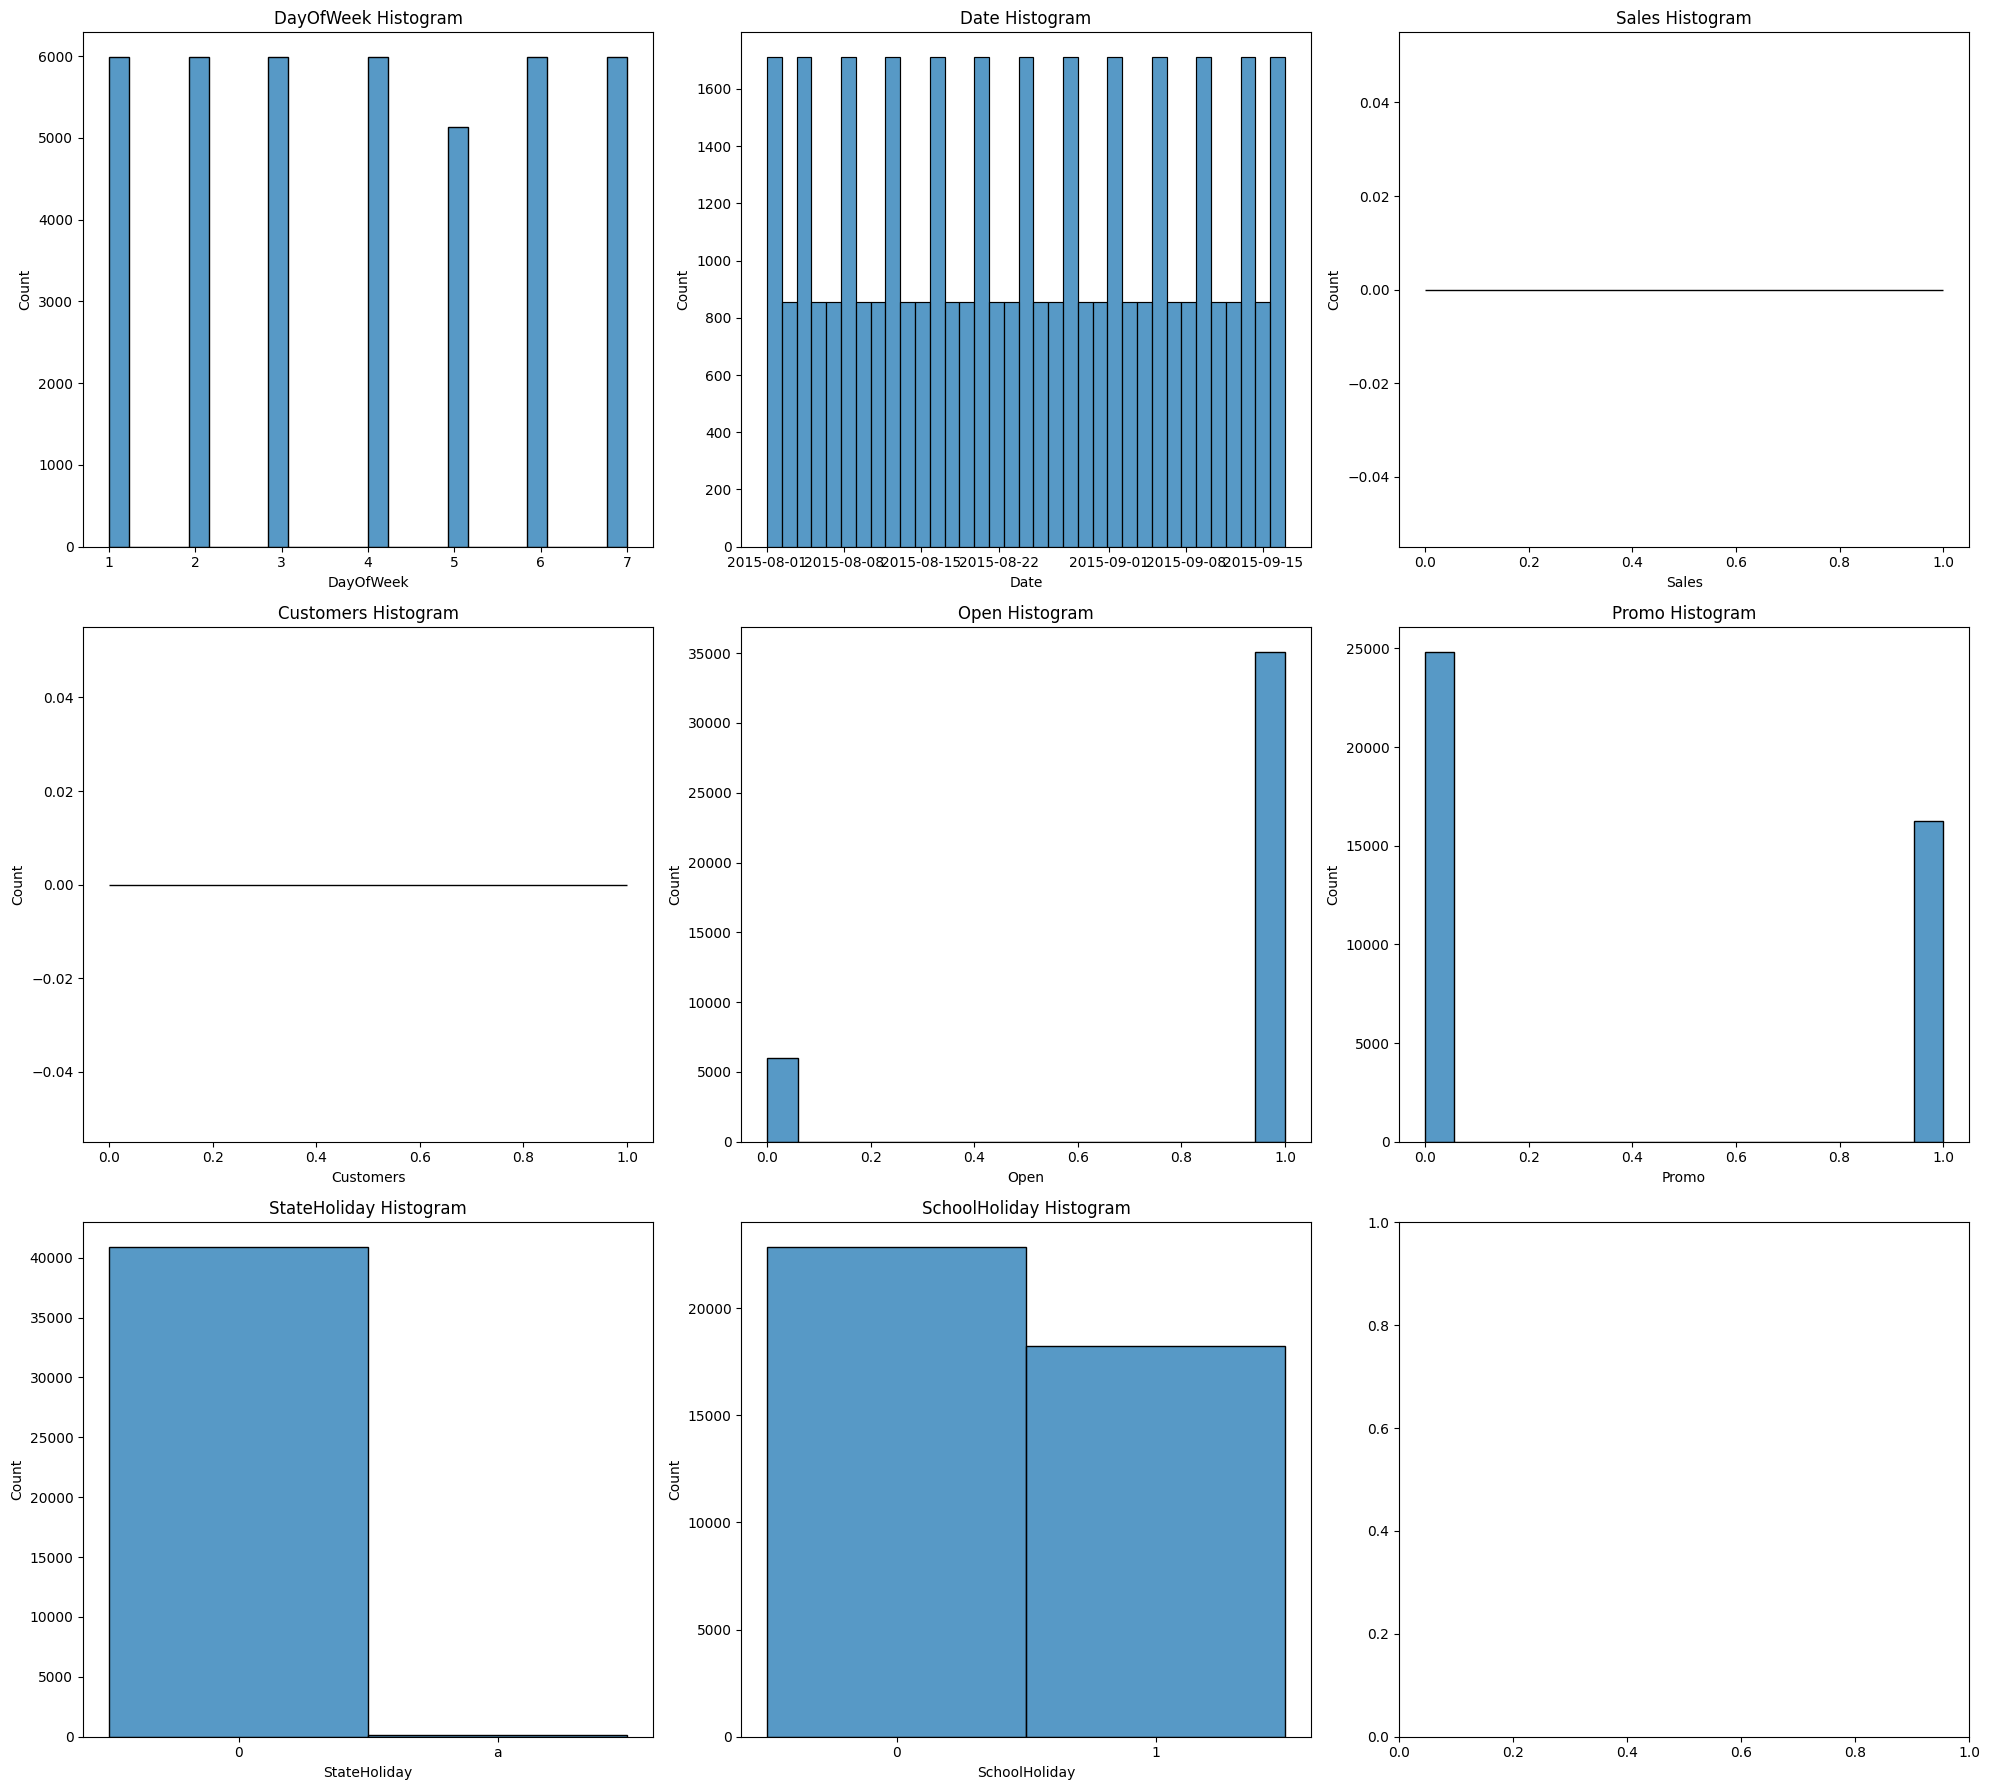

In [18]:
#%%
# Plot histplot and kde of different variables in the dataset
def plot_histogram_and_boxplot(dataframe, column_name, ax):
    sns.histplot(data=dataframe, x=column_name, ax=ax)
    ax.set_title(f'{column_name} Histogram')

def plot_dataframe(unshow_feature, df):
    df = df.drop(columns=unshow_feature)
    total_len = len(df.columns)
    fig, axes = plt.subplots(3, 3, figsize=(20, 18))

    for i, col in enumerate(df.columns):
        plot_histogram_and_boxplot(df, col, axes[i // 3, i % 3])

    plt.tight_layout()
    plt.show()

plot_dataframe('Store',df_store)
plot_dataframe('Store', df_train)
plot_dataframe('Store', df_test)

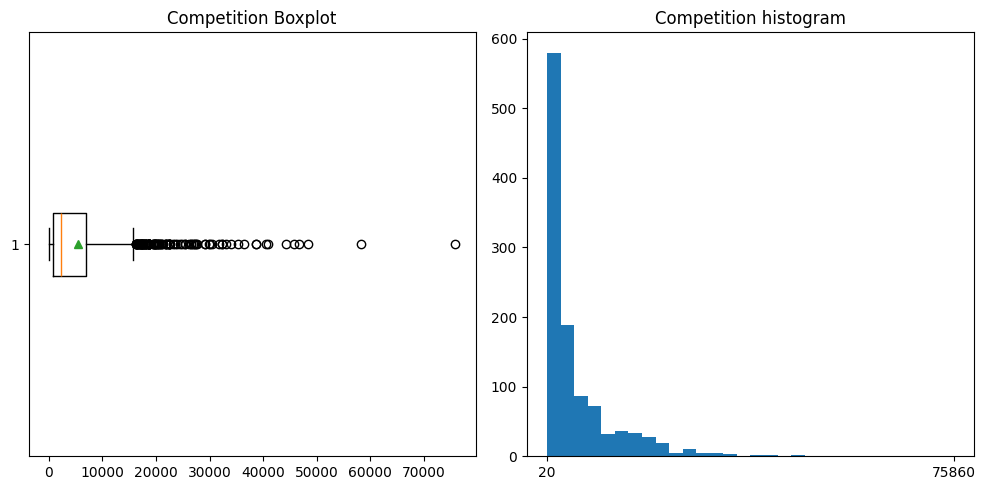

Mean: 5404.901079136691
Median: 2325.0
Standard Deviation: 7663.174720367944


In [19]:
#%%
#
df_store_CompetitionDistance_distribution=df_store.drop(df_store[pd.isnull(df_store.CompetitionDistance)].index)
# Box-plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.boxplot(df_store_CompetitionDistance_distribution.CompetitionDistance, showmeans=True,vert=False)
plt.title('Competition Boxplot')

# Histplot
plt.subplot(1, 2, 2)  
plt.hist(df_store_CompetitionDistance_distribution.CompetitionDistance, cumulative=False, bins=30)
plt.title("Competition histogram")
plt.xticks((min(df_store_CompetitionDistance_distribution.CompetitionDistance), max(df_store_CompetitionDistance_distribution.CompetitionDistance)))

plt.tight_layout() 
plt.show()

column_mean = df_store['CompetitionDistance'].mean()
column_median = df_store['CompetitionDistance'].median()
column_std = df_store['CompetitionDistance'].std()

print("Mean:", column_mean)
print("Median:", column_median)
print("Standard Deviation:", column_std)
# Mean of 'CompetitionDistance' is much larger than median of 'CompetitionDistance', because the mean is biased by the outliners, so we will use median to fill the null data for competitiondistance


For the variable ‘CompetitionDistance’: Observing Figure 1, there is a significant left skew in the data, indicating many large outliers. This suggests that some stores prefer to locate far from competitors to reduce the impact of competition on sales. At the same time, the mean (5405) is greater than the median (2325), with the mean being significantly affected by outliers. Therefore, for missing values of this variable, the median will be used for replacement. 

For the variables ‘CompetitionOpenSinceMonth’ and ‘CompetitionOpenSinceYea’r: Since there is a large variation for each store and the dataset does not provide more relevant information, we will fill in these missing values with zero.

In [20]:
#%%
# CompetitionDistance, filling the data using median
df_store[pd.isnull(df_store.CompetitionDistance)] 
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)
# CompetitionOpenSinceMonth and CompetitionOpenSinceYear, filling the data with 0
df_store.CompetitionOpenSinceMonth.fillna(0, inplace = True)
df_store.CompetitionOpenSinceYear.fillna(0,inplace=True)

/var/folders/n0/v391ctcn3q935by3r0yv_bb80000gn/T/ipykernel_58362/69711639.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)
/var/folders/n0/v391ctcn3q935by3r0yv_bb80000gn/T/ipykernel_58362/69711639.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediat

In [21]:
# Cheak the null of "Promo2SinceWeek, Promo2SinceYear and PromoInterval"
print("The number of rows that its Promo2SinceWeek is null is "+str(df_store[pd.isnull(df_store.Promo2SinceWeek)].shape[0]))
print("The number of rows that its Promo2SinceWeek is null and Promo2 is 0 is "+str(df_store[pd.isnull(df_store.Promo2SinceWeek)& (df_store.Promo2==0)].shape[0]))
print("The number of rows that its Promo2SinceYear is null and Promo2 is 0 is "+str(df_store[pd.isnull(df_store.Promo2SinceYear)& (df_store.Promo2==0)].shape[0]))
print("The number of rows that its PromoInterval is null and Promo2 is 0 is "+str(df_store[pd.isnull(df_store.PromoInterval)& (df_store.Promo2==0)].shape[0]))
# It means when there is no promotion, the other promotion variables will also be null, so fill null with 0 in these columns.


The number of rows that its Promo2SinceWeek is null is 544
The number of rows that its Promo2SinceWeek is null and Promo2 is 0 is 544
The number of rows that its Promo2SinceYear is null and Promo2 is 0 is 544
The number of rows that its PromoInterval is null and Promo2 is 0 is 544


In [22]:
print ()
open0 = df_train[(df_train.Open == 0)].count()[0]
print ("-Over those two years, {} is the number of times that different stores closed on given days.".format(open0))
print ()
open0_InSchoolHoliday = df_train[(df_train.Open == 0) & (df_train.SchoolHoliday == "1")&(df_train.StateHoliday == '0') ].count()[0]
print ("-From those closed events, {} times occured because there was a school holiday. " .format(open0_InSchoolHoliday))
print ()
open0_InStateHoliday = df_train[(df_train.Open == 0) &
         ((df_train.StateHoliday == 'a') |
          (df_train.StateHoliday == 'b') | 
          (df_train.StateHoliday == 'c'))].count()[0]
print ("-And {} times it occured because of either a bank holiday or easter or christmas.".format(open0_InStateHoliday))
print ()
open1_WithOutHoliday = df_train[(df_train.Open == 0) &
         (df_train.StateHoliday == "0")
         &(df_train.SchoolHoliday == "0")].count()[0]
print ("-But interestingly enough, {} times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.".format(open1_WithOutHoliday))
print ()


-Over those two years, 172817 is the number of times that different stores closed on given days.

-From those closed events, 3067 times occured because there was a school holiday. 

-And 30140 times it occured because of either a bank holiday or easter or christmas.



/var/folders/n0/v391ctcn3q935by3r0yv_bb80000gn/T/ipykernel_58362/1550108646.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  open0 = df_train[(df_train.Open == 0)].count()[0]
/var/folders/n0/v391ctcn3q935by3r0yv_bb80000gn/T/ipykernel_58362/1550108646.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  open0_InSchoolHoliday = df_train[(df_train.Open == 0) & (df_train.SchoolHoliday == "1")&(df_train.StateHoliday == '0') ].count()[0]
/var/folders/n0/v391ctcn3q935by3r0yv_bb80000gn/T/ipykernel_58362/1550108646.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer

-But interestingly enough, 139610 times those shops closed on days for no apparent reason when no holiday was announced. In fact, those closings were done with no pattern whatsoever and in this case from 2013 to 2015 at almost any month and any day.



/var/folders/n0/v391ctcn3q935by3r0yv_bb80000gn/T/ipykernel_58362/1550108646.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  open1_WithOutHoliday = df_train[(df_train.Open == 0) &


In [23]:
# fill open with 1, assume that they all open these days
df_test.Open.fillna(1,inplace = True)
# merge train dataset and test dataset with store dataset
train = pd.merge(df_train, df_store, how = 'left', on = 'Store')
test = pd.merge(df_test, df_store, how = 'left', on = 'Store')
train.to_csv("train_store.csv")

/var/folders/n0/v391ctcn3q935by3r0yv_bb80000gn/T/ipykernel_58362/2497556712.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test.Open.fillna(1,inplace = True)


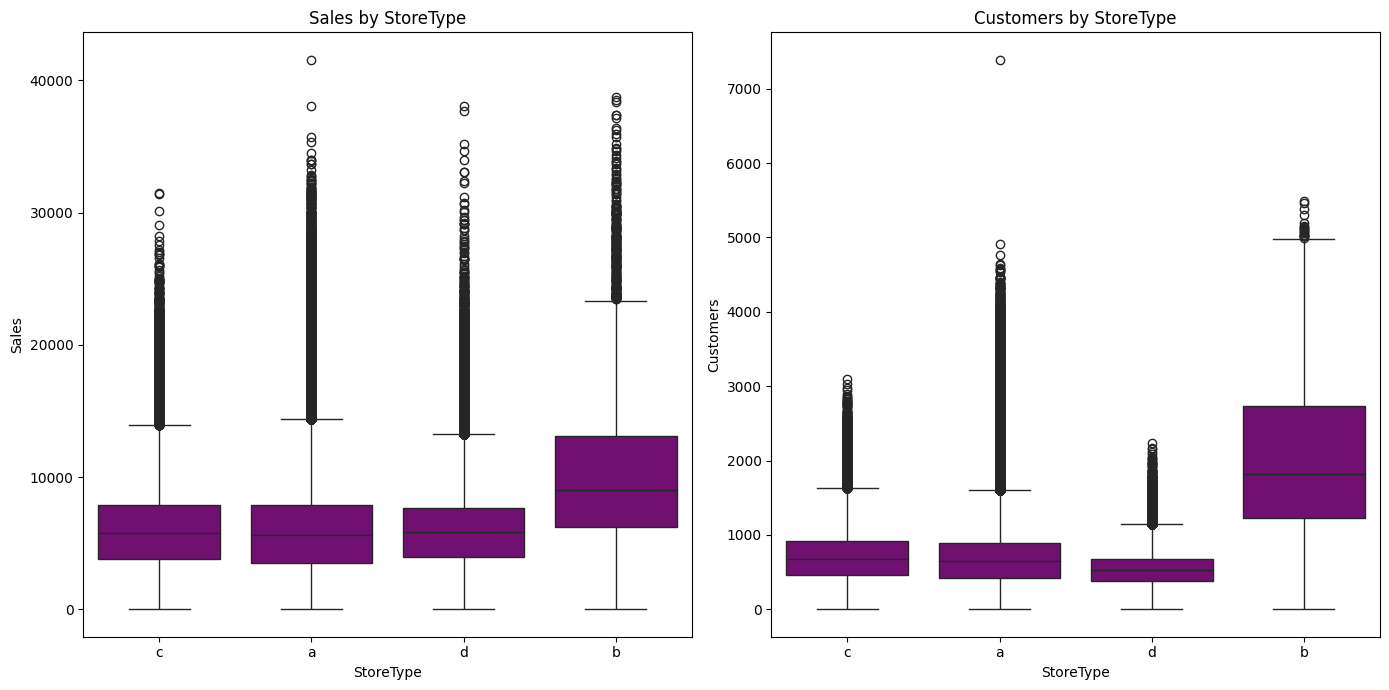

In [24]:
# check whether there are outliers in the store dataset
# Set up the matplotlib figure: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 7), sharex=True)

# Plot a boxplot for Sales by StoreType
sns.boxplot(x='StoreType', y='Sales', data=train, ax=axes[0],color = "purple")
axes[0].set_title('Sales by StoreType')

# Plot a boxplot for Customers by StoreType
sns.boxplot(x='StoreType', y='Customers', data=train, ax=axes[1], color = "purple")
axes[1].set_title('Customers by StoreType')

# Display the plot
plt.tight_layout()
plt.show()
#there are two outliers in each dataset, storenums are 817 and 909

It was observed that for StoreType=a, there is an outlier in both box plots. Upon data inspection, it was noted that these points had a high number of customers or sales, which does not conform to the usual positive correlation between customers and sales. Therefore, these points were judged
to be outliers and were excluded.

In [25]:
# drop the outliers
# find the indices of the maximum of 'sales' and 'customers', and drop them
sales_max = train['Sales'].max()
customers_max = train['Customers'].max()

indices_of_sales_max = train[train['Sales'] == sales_max].index
indices_of_customers_max = train[train['Customers'] == customers_max].index

train = train.drop(indices_of_sales_max)
train = train.drop(indices_of_customers_max)

# EDA

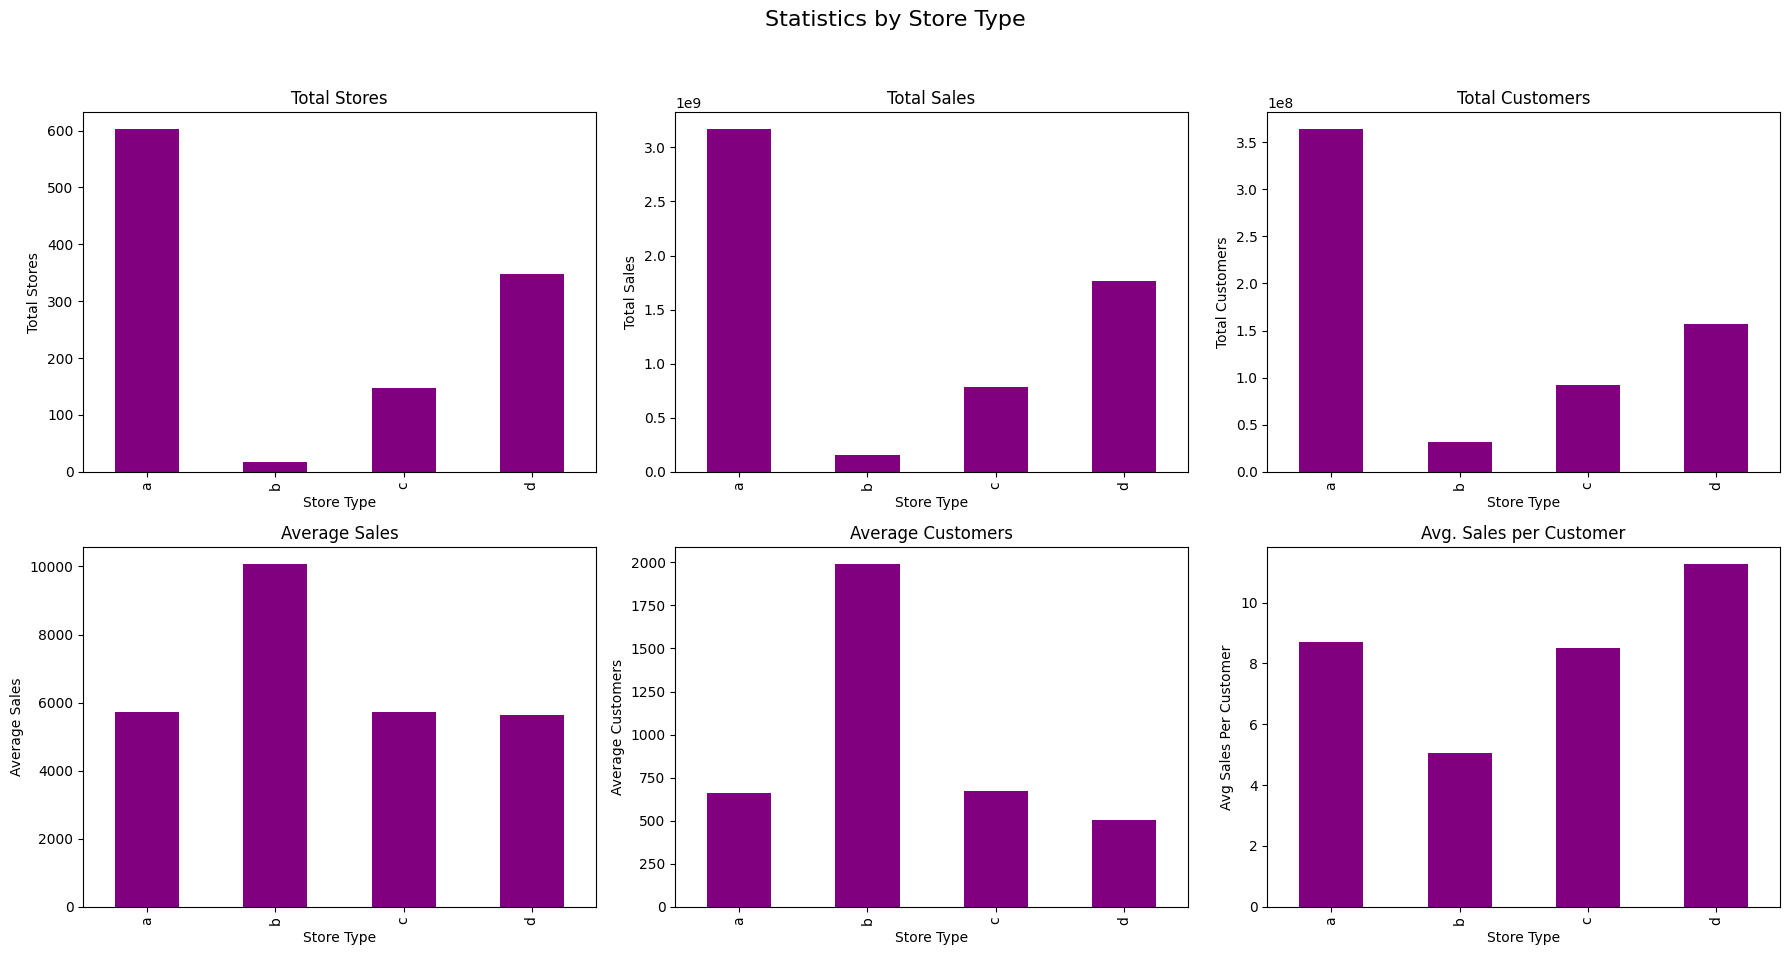

In [26]:
# Group data by StoreType
grouped = train.groupby('StoreType').agg(
    Total_Stores=('Store', 'nunique'),
    Total_Sales=('Sales', 'sum'),
    Total_Customers=('Customers', 'sum'),
    Average_Sales=('Sales', 'mean'),
    Average_Customers=('Customers', 'mean')
)
# Calculate average sales per customer
grouped['Avg_Sales_Per_Customer'] = grouped['Total_Sales'] / grouped['Total_Customers']

# Creating the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Statistics by Store Type', fontsize=16)

# Plotting each statistic
stats = ['Total_Stores', 'Total_Sales', 'Total_Customers', 'Average_Sales', 'Average_Customers', 'Avg_Sales_Per_Customer']
titles = ['Total Stores', 'Total Sales', 'Total Customers', 'Average Sales', 'Average Customers', 'Avg. Sales per Customer']

for ax, stat, title in zip(axes.flatten(), stats, titles):
    grouped[stat].plot(kind='bar', ax=ax, color="purple")
    ax.set_title(title)
    ax.set_xlabel('Store Type')
    ax.set_ylabel(stat.replace('_', ' '))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()

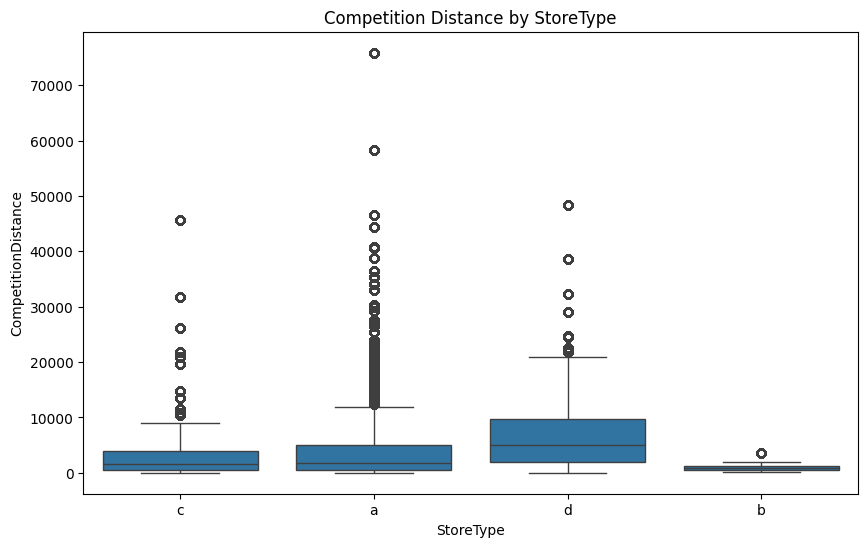

In [27]:
# Plot a boxplot for CompetitionDistance by StoreType
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='CompetitionDistance', data=train)
plt.title('Competition Distance by StoreType')
plt.show()

An analysis of the number of stores and customer counts for each store type, as shown in Figure 3, reveals that type b stores have the fewest numbers but the highest average sales and customer counts among the four store types. 

Observing the box plot of CompetitionDistance for each store type in Figure 4, it is noted that type B stores have the shortest average distance to competitors and still maintain good sales even when close to competitors. There are two possible reasons for this: first, type B stores sell products that are significantly different from other types of stores, prompting customers to shop exclusively at type b stores; second, it could be due to a demand that exceeds supply in the type b areas.

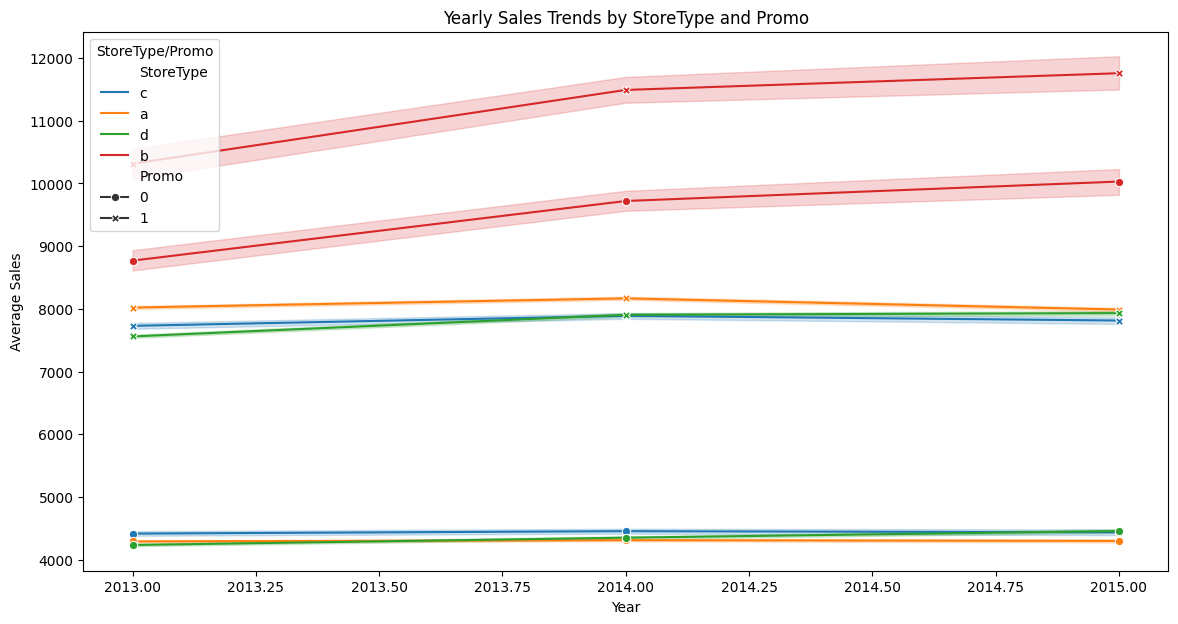

In [28]:
# Ensure that the 'Date' column is a datetime type and extract the year
train['Year'] = train['Date'].dt.year

# Create a line plot for the sales over years for different StoreTypes and Promo
plt.figure(figsize=(14, 7))

# Use sns.lineplot to aggregate the data and plot the mean sales for each year, StoreType, and Promo
sns.lineplot(x='Year', y='Sales', hue='StoreType', style='Promo', data=train, markers=True, dashes=False)

plt.title('Yearly Sales Trends by StoreType and Promo')
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.legend(title='StoreType/Promo')
plt.show()

The impact of promotions on different types of stores was also explored in Figure 5, revealing that type A stores are the most sensitive to promotions, with an average daily sales increase of 2300, indicating that customers may be more price-sensitive to the products sold in these stores.

/var/folders/n0/v391ctcn3q935by3r0yv_bb80000gn/T/ipykernel_58362/1720287324.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_open['StateHoliday'] = data_open['StateHoliday'].replace(0, '0')


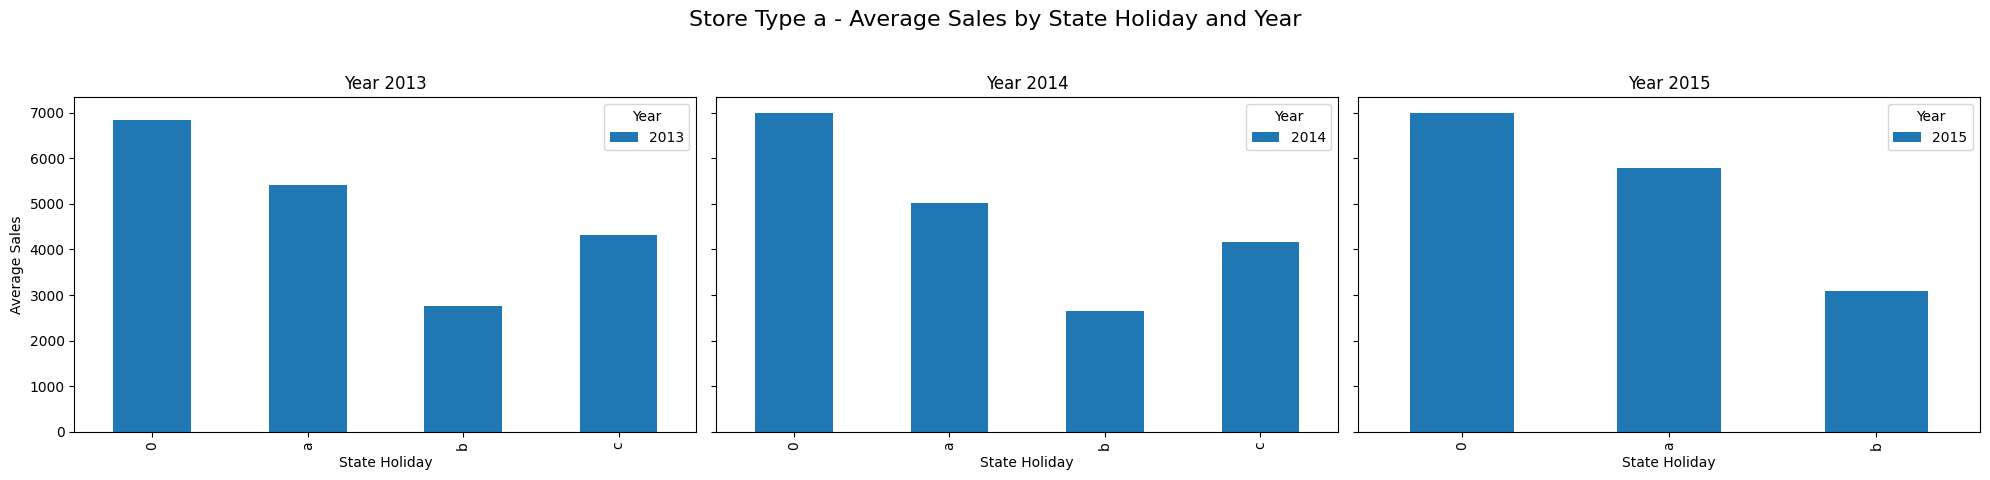

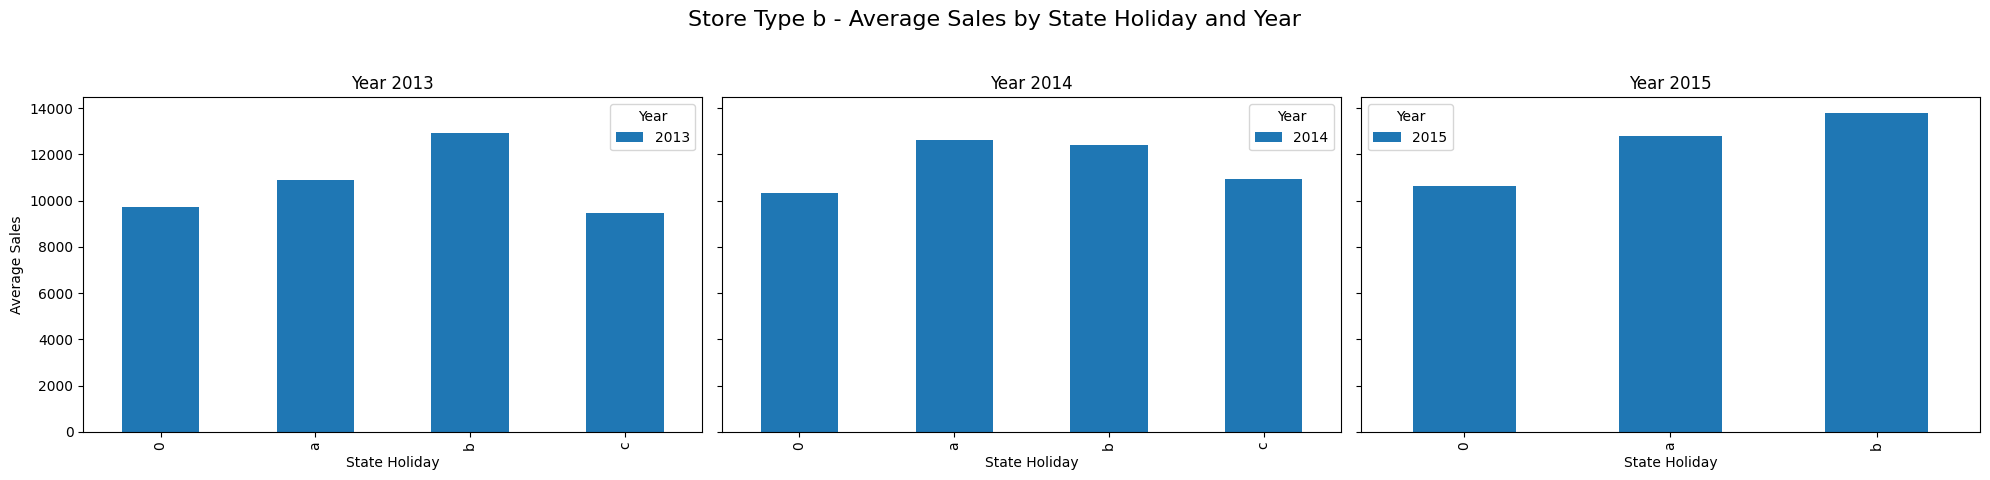

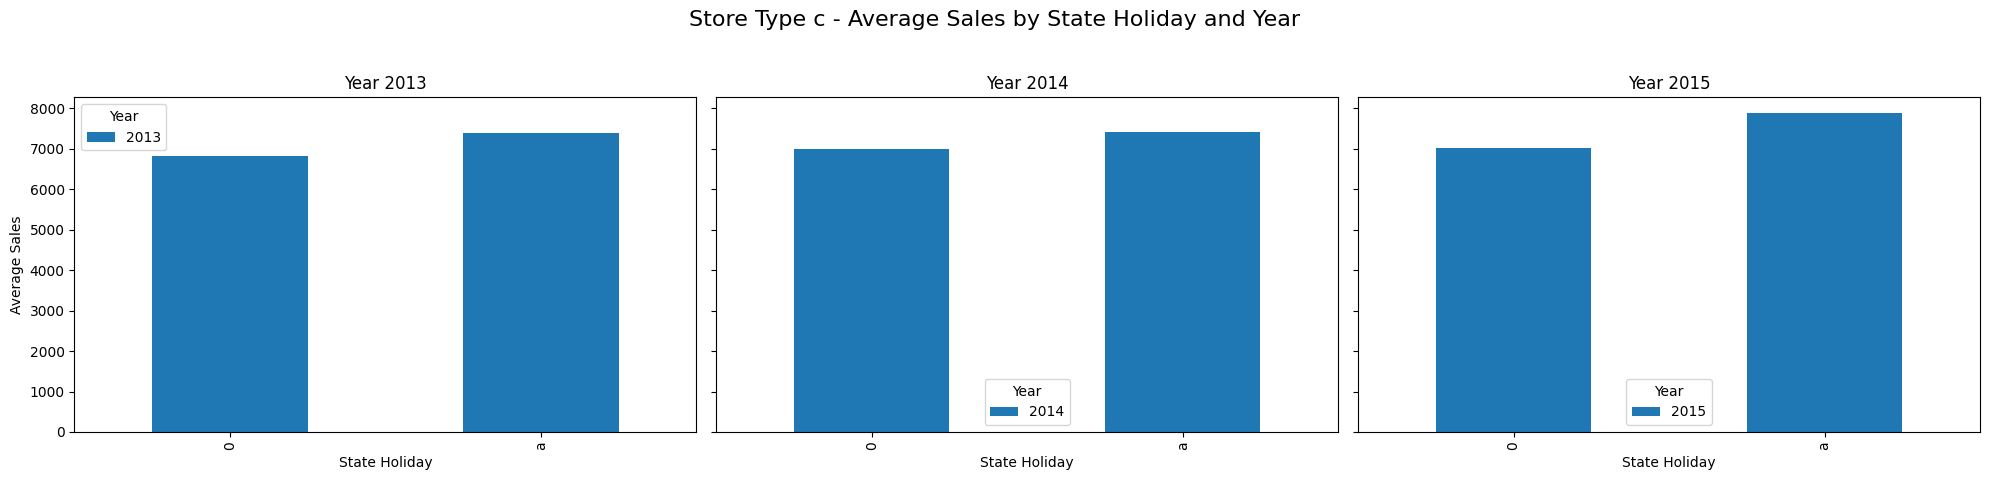

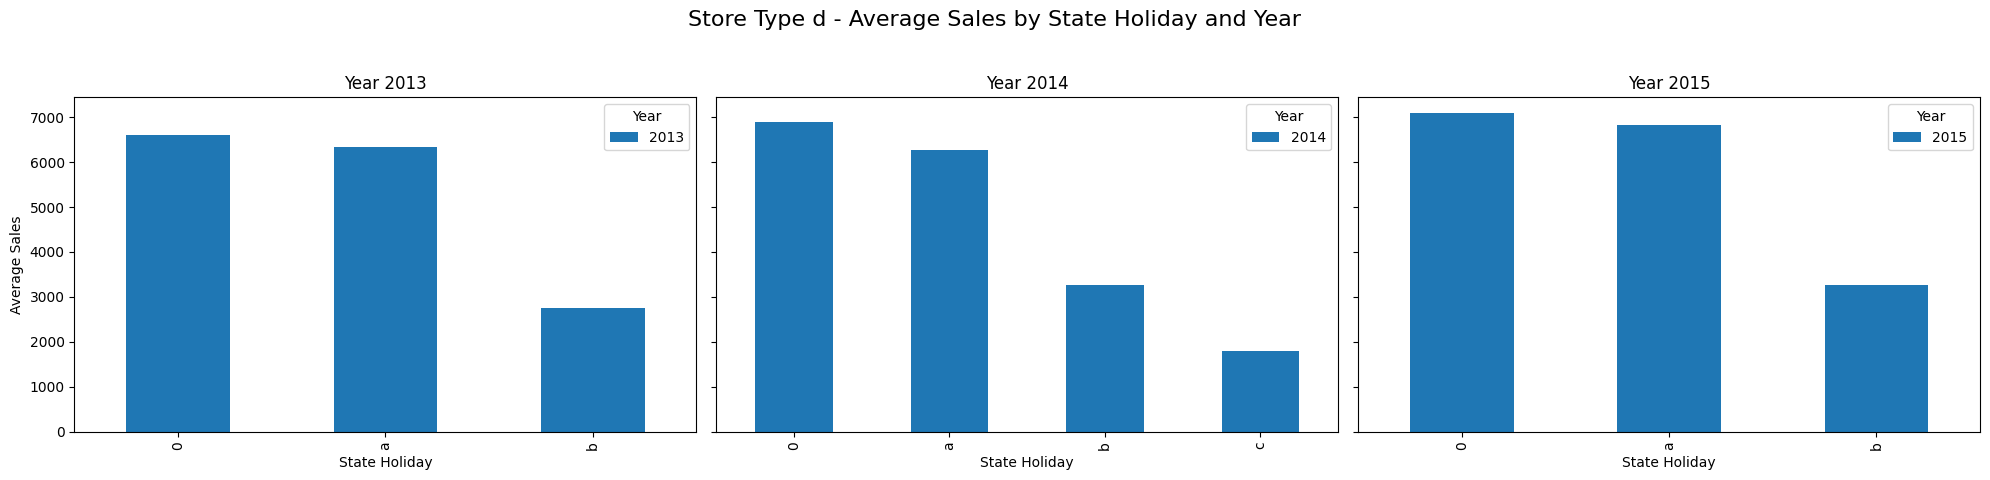

In [29]:
# Filter out days when the store was closed (Sales would be 0 or store was not open)
data_open = train[train['Open'] == 1]

# For StateHoliday, make sure to consider '0' and 0 as non-holiday
data_open['StateHoliday'] = data_open['StateHoliday'].replace(0, '0')

# Group data by StoreType, Year, and StateHoliday, then calculate mean sales
grouped_sales = data_open.groupby(['StoreType', 'Year', 'StateHoliday']).agg(Average_Sales=('Sales', 'mean')).reset_index()

# Unique StoreTypes and Years for plotting
store_types = grouped_sales['StoreType'].unique()
years = sorted(grouped_sales['Year'].unique())

# Plotting
for store_type in store_types:
    fig, axes = plt.subplots(nrows=1, ncols=len(years), figsize=(20, 5), sharey=True)
    fig.suptitle(f'Store Type {store_type} - Average Sales by State Holiday and Year', fontsize=16)
    
    for ax, year in zip(axes, years):
        df_subset = grouped_sales[(grouped_sales['StoreType'] == store_type) & (grouped_sales['Year'] == year)]
        if not df_subset.empty:
            df_subset.pivot(index='StateHoliday', columns='Year', values='Average_Sales').plot(kind='bar', ax=ax)
            ax.set_title(f'Year {year}')
            ax.set_xlabel('State Holiday')
            ax.set_ylabel('Average Sales')
        else:
            ax.set_title(f'Year {year} (No Data)')
            ax.set_xlabel('State Holiday')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()